In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
#a#

import math

def taylor_seno(angulo, iteraciones):
  seno = 0
  for i in range(iteraciones):
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i +1)
  return seno

In [ ]:
import numpy as np

angulo_deg = int(input(print("Ingrese el ángulo en grados")))
iter = int(input(print("Ingrese el número de iteraciones")))
x = np.deg2rad(angulo_deg) #Convertir grados a radianes#

seno = taylor_seno(x, iter)
seno_real = np.sin(x)

print(f'El valor de Seno con {iter} iteraciones es {seno}')
print(f'El valor real es {seno_real}')

print(seno == seno_real) #Comparar el valor obtenido con la función con el real#

Ingrese el ángulo en grados
None45
Ingrese el número de iteraciones
None10
El valor de Seno con 10 iteraciones es 0.7071067811865475
El valor real es 0.7071067811865475
True


In [ ]:
#b#

def taylor_seno32(angulo, tolerancia):
  seno = 0
  real = math.sin(angulo)
  i = 0
  while abs(real - seno) > tolerancia:
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i +1)
    i += 1
  return i, seno

In [ ]:
angulo_deg = int(input(print("Ingrese el ángulo en grados")))
x = math.radians(angulo_deg) #Convertir grados a radianes#
tol = np.finfo(np.float32).eps #Epsilon de la máquina : Tolerancia#

N, seno32 = taylor_seno32(x,tol)

print(f'Son necesarios {N} términos y el valor del seno es {seno32} radianes')

Ingrese el ángulo en grados
None45
Son necesarios 5 términos y el valor del seno es 0.7071067829368671 radianes


In [ ]:
#Gráficamente#

def taylor_seno32_errores(angulo, tolerancia):
  max_iter = 100
  seno = 0
  real = math.sin(angulo)
  i = 0
  errors = np.zeros(max_iter) #Guardar el error#
  iteraciones = np.arange(max_iter) #Guardar la iteración asociada al error#

  while abs(real - seno) > tolerancia:
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i +1)
    error = abs(real-seno)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], seno

Ingrese el ángulo en grados
None45


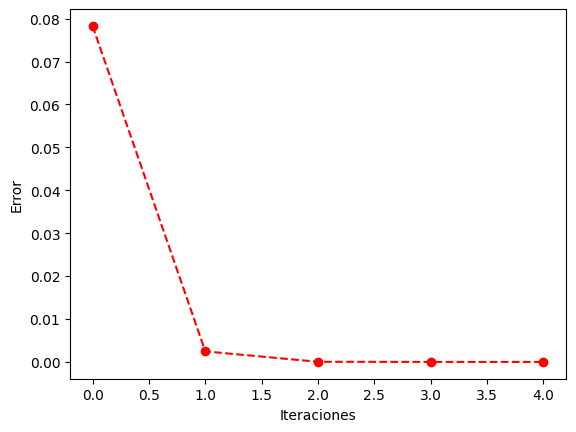

El valor del seno es 0.7071067829368671


In [ ]:
import matplotlib.pyplot as plt

angulo_deg = int(input(print("Ingrese el ángulo en grados")))
x = math.radians(angulo_deg) #Convertir grados a radianes#
tol = np.finfo(np.float32).eps #Epsilon de la máquina : Tolerancia#

er, N, seno = taylor_seno32_errores(x, tol)

plt.plot(N, er, 'ro--')
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.show()
print(f'El valor del seno es {seno}')

In [ ]:
#c#

def taylor_seno64(angulo, tolerancia):
  seno = 0
  real = math.sin(angulo)
  i = 0
  while abs(real - seno)> tolerancia:
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i + 1)
    i += 1
  return i, seno

In [ ]:
angulo_deg = int(input(print("Ingrese el ángulo en grados")))
x = math.radians(angulo_deg)
tol = np.finfo(np.float64).eps

N, seno64 = taylor_seno64(x, tol)

print(f'Son necesarios {N} términos y el valor del seno es {seno64} radianes')

Ingrese el ángulo en grados
None45
Son necesarios 8 términos y el valor del seno es 0.7071067811865475 radianes


In [ ]:
#d#

def seno32(angulo, iteraciones):
  seno = 0
  for i in range(iteraciones):
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i +1)
  return seno

def seno64(angulo, iteraciones):
  seno = 0
  for i in range(iteraciones):
    seno += (-1)**i * angulo**(2*i + 1)/math.factorial(2*i +1)
  return seno

angulo_deg = int(input(print("Ingrese el ángulo en grados para calcular el error porcentual")))
angulo = math.radians(angulo_deg)
iter_32 = int(input(print("Ingrese el número de iteraciones para float32")))
iter_64 = int(input(print("Ingrese el número de iteraciones para float64")))
seno32 = seno32(angulo, iter_32)
seno64 = seno64(angulo, iter_64)
error_32 = (abs(seno32- math.sin(angulo))/math.sin(angulo))*100
error_64 = (abs(seno64 - math.sin(angulo))/math.sin(angulo))*100

print(f'El error porcentual para float32 es {error_32} y para float64 es {error_64}')

Ingrese el ángulo en grados para calcular el error porcentual
None45
Ingrese el número de iteraciones para float32
None5
Ingrese el número de iteraciones para float64
None5
El error porcentual para float32 es 2.475325811534497e-07 y para float64 es 2.475325811534497e-07


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [19]:
#a#

def exponencial(x, N):
  exponencial = 0
  for i in range(0,N+1):
    exponencial += (-1)**i * (x**i)/math.factorial(i)
    i += 1
  return exponencial

In [3]:
x = float(input(print("Ingrese un valor para x menor o igual a 1")))
if x > 1:
  raise ValueError("El número debe ser menor o igual a 1")
N = int(input(print("Ingrese el número de iteraciones")))
exponencial_exacto = np.exp(-x)
exp = exponencial(x, N)

print(f'El valor calculado para la exponencial de -{x} es {exp}. El valor exacto es {exponencial_exacto}')

Ingrese un valor para x menor o igual a 1
None0.5
Ingrese el número de iteraciones
None100
El valor calculado para la exponencial de -0.5 es 0.6065306597126333. El valor exacto es 0.6065306597126334


In [4]:
def exponencial_truncado(x,N):
  exponencial = 0
  exp_n = 0
  #valor_max = abs(((-x)**(N+1))/math.factorial(N+1))
  for i in range(N):
    exponencial += (-1)**i * (x**i)/math.factorial(i)
    if abs(exponencial - exp_n) <= 1e-7:
      break
    exp_n = exponencial
  return exponencial, i

In [5]:
x = float(input(print("Ingrese un número menor o igual a 1")))
N = int(input(print("Ingrese el número de repeticiones")))
respuesta, iter = exponencial_truncado(x,N)
print(f'El valor del exponencial de -{x} es {respuesta} y converge a las {iter} repeticiones')

Ingrese un número menor o igual a 1
None0.5
Ingrese el número de repeticiones
None100
El valor del exponencial de -0.5 es 0.6065306648375496 y converge a las 8 repeticiones


In [6]:
#b#

def exponencial(x, N):
  exponencial = 0
  for i in range(0,N+1):
    exponencial += (-1)**i * (x**i)/math.factorial(i)
    i += 1
  return exponencial

x=[9.9,9.99,9.999,10.1,10.01,10.001]
N=100
for t in range(0,6):
  respuesta = exponencial(x[t],N)
  print(respuesta)

5.017468331832344e-05
4.5856206509935694e-05
4.544535225539738e-05
4.1079555300007105e-05
4.494819301816431e-05
4.53545527884327e-05


In [11]:
#c#

def exponencial_ingeniosa(x,N):
  exponencial = 0
  for i in range(N):
    exponencial += (x**i)/(math.factorial(i))
  return 1/exponencial

In [12]:
x=float(input(print("Ingrese cualquier valor para x")))
N= int(input(print("Ingrese el número de iteraciones")))
resultado1 = exponencial_ingeniosa(x,N)
resultado2 = exponencial(x,N)
exp_exacto = np.exp(-x)

print(f'El valor calculado para la exponencial de -{x} es: {resultado1} usando el método de 1/e^x, {resultado2} usando el método convencional, y el valor exacto es {exp_exacto}')

Ingrese cualquier valor para x
None20
Ingrese el número de iteraciones
None100
El valor calculado para la exponencial de -20.0 es: 2.0611536224385583e-09 usando el método de 1/e^x, 1.3081483199294182e-09 usando el método convencional, y el valor exacto es 2.061153622438558e-09


In [37]:
#d#

# 1 < x < 10

for t in range(1,10):
  result = exponencial(t,20)
  error = (abs(result - np.exp(-t))/np.exp(-t))*100
  print(f'El error para x = {t} es {error}')

# 10 < x < 100

for t in range(10,110,10):
  result = exponencial(t,20)
  error = (abs(result - np.exp(-t))/np.exp(-t))*100
  print(f'El error para x = {t} es {error}')



El error para x = 1 es 3.017899073375402e-14
El error para x = 2 es 2.785088321729474e-11
El error para x = 3 es 3.6165257143603056e-07
El error para x = 4 es 0.0003972697310489605
El error para x = 5 es 0.11269157545140866
El error para x = 6 es 13.582151434120467
El error para x = 7 es 907.1121399614135
El error para x = 8 es 39337.55447620117
El error para x = 9 es 1226877.1860896563
El error para x = 10 es 29508461.06118008
El error para x = 20 es 1.0322961913615715e+18
El error para x = 30 es 9.114677145472086e+25
El error para x = 40 es 7.051843076518923e+32
El error para x = 50 es 1.4456583012194992e+39
El error para x = 60 es 1.2830677236476448e+45
El error para x = 70 es 6.400524316024733e+50
El error para x = 80 es 2.096243782451916e+56
El error para x = 90 es 4.9813912078218014e+61
El error para x = 100 es 9.194561856792607e+66


Es claro como, al ir aumentando el valor de x, la serie comienza a perder precisión pues se obtienen mayores errores, hasta que, a partir de x=10, la serie comienza a diverger.

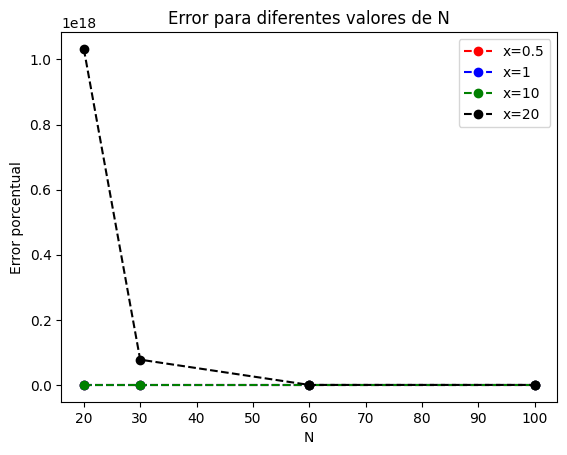

In [52]:
#e#

# x=0.5
result1 = exponencial(0.5,20)
error1 = (abs(result - np.exp(-0.5))/np.exp(-0.5))*100
result2 = exponencial(0.5,30)
error2 = (abs(result - np.exp(-0.5))/np.exp(-0.5))*100
result3 = exponencial(0.5,60)
error3 = (abs(result - np.exp(-0.5))/np.exp(-0.5))*100
result4 = exponencial(0.5,100)
error4 = (abs(result - np.exp(-0.5))/np.exp(-0.5))*100

error_05 = [error1,error2,error3,error4]

# x=1
result5 = exponencial(1,20)
error5 = (abs(result5 - np.exp(-1))/np.exp(-1))*100
result6 = exponencial(1,30)
error6 = (abs(result6 - np.exp(-1))/np.exp(-1))*100
result7 = exponencial(1,60)
error7 = (abs(result7 - np.exp(-1))/np.exp(-1))*100
result8 = exponencial(1,100)
error8 = (abs(result8 - np.exp(-1))/np.exp(-1))*100

error_1 = [error5,error6,error7,error8]

# x=10
result9 = exponencial(10,20)
error9 = (abs(result9 - np.exp(-10))/np.exp(-10))*100
result10 = exponencial(10,30)
error10 = (abs(result10 - np.exp(-10))/np.exp(-10))*100
result11 = exponencial(10,60)
error11 = (abs(result11 - np.exp(-10))/np.exp(-10))*100
result12 = exponencial(10,100)
error12 = (abs(result12 - np.exp(-10))/np.exp(-10))*100

error_10 = [error9,error10,error11,error12]

# x=20
result13 = exponencial(20,20)
error13 = (abs(result13 - np.exp(-20))/np.exp(-20))*100
result14 = exponencial(20,30)
error14 = (abs(result14 - np.exp(-20))/np.exp(-20))*100
result15 = exponencial(20,60)
error15 = (abs(result15 - np.exp(-20))/np.exp(-20))*100
result16 = exponencial(20,100)
error16 = (abs(result16 - np.exp(-20))/np.exp(-20))*100

error_20 = [error13,error14,error15,error16]


N = [20,30,60,100]

plt.plot(N,error_05,'ro--',label='x=0.5')
plt.plot(N,error_1,'bo--',label='x=1')
plt.plot(N,error_10,'go--',label='x=10')
plt.plot(N,error_20,'ko--',label='x=20')
plt.legend()
plt.title('Error para diferentes valores de N')
plt.xlabel("N")
plt.ylabel("Error porcentual")
plt.show()



# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [54]:
#a#

def serie1(x,n):
  suma = 0
  for i in range(1,2*n+1):
    suma += (-1)**i * (i/(i+1))
  return suma

def serie2(x,n):
  suma = 0
  for i in range(1,n+1):
    suma += -(2*i-1)/(2*i) + 2*i/(2*i+1)
  return suma

def serie3(x,n):
  suma = 0
  for i in range(1,n+1):
    suma += 1/(2*i*(2*i+1))
  return suma

In [55]:
x = float(input(print("Ingrese un valor para x")))
N = int(input(print("Ingrese el número de iteraciones")))
suma1, suma2, suma3 = serie1(x,N), serie2(x,N), serie3(x,N)
print(f'El valor de la serie 1 es {suma1}, la serie 2 es {suma2} y la serie 3 es {suma3}')

Ingrese un valor para x
None20
Ingrese el número de iteraciones
None10
El valor de la serie 1 es 0.2836095492055243, la serie 2 es 0.2836095492055243 y la serie 3 es 0.2836095492055244


In [81]:
#b#

#serie 1
def serie1_convergencia(x,N):
  suma = 0
  max = 0
  for i in range(1,2*N+1):
    suma += (-1)**i * (i/(i+1))
    if abs(suma - max) <= 1e-4:
      break
    max = suma
  return suma, i

#serie 2
def serie2_convergencia(x,N):
  suma = 0
  max = 0
  for i in range(1,N+1):
    suma += -(2*i-1)/(2*i) + 2*i/(2*i+1)
    if abs(suma - max) <= 1e-4:
      break
    max = suma
  return suma, i

#serie 3
def serie3_convergencia(x,N):
  suma = 0
  max = 0
  for i in range(1,N+1):
    suma += 1/(2*i*(2*i+1))
    if abs(suma - max) <= 1e-4:
      break
    max = suma
  return suma, i

In [84]:
x = float(input(print("Ingrese un valor para x")))
N = int(input(print("Ingrese el número de iteraciones")))
suma1, i1 = serie1_convergencia(x,N)
suma2, i2 = serie2_convergencia(x,N)
suma3, i3 = serie3_convergencia(x,N)
print(f'Para el valor de {x}, la serie 1 converge al valor de {suma1} a las {i1} iteraciones; la serie 2 converge al valor de {suma2} a las {i2} iteraciones y la serie 3 converge al valor de {suma3} a las {i3} iteraciones')

Ingrese un valor para x
None100
Ingrese el número de iteraciones
None1000000
Para el valor de 100.0, la serie 1 converge al valor de 0.3068525694401464 a las 2000000 iteraciones; la serie 2 converge al valor de 0.3019268305907944 a las 50 iteraciones y la serie 3 converge al valor de 0.3019268305907949 a las 50 iteraciones


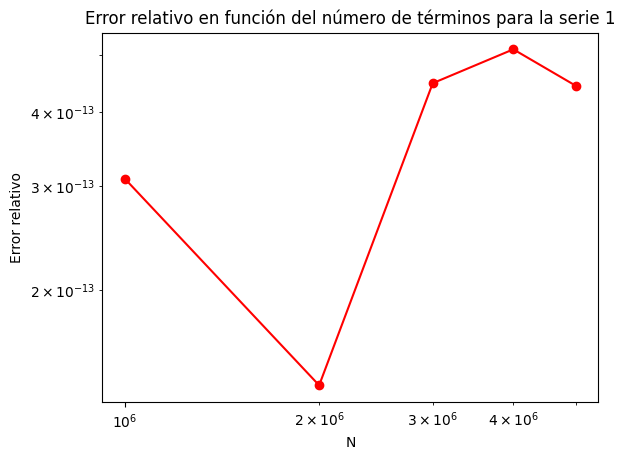

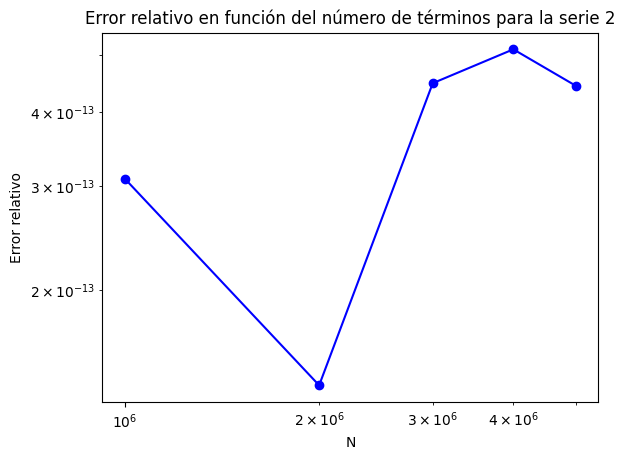

In [87]:
#c#

x=100
N=[1*10**6, 2*10**6, 3*10**6, 4*10**6, 5*10**6]
#N=[10,100,1000,10000,1000000]

#error serie 1
E_1 = abs((serie1(x,N[0])-serie3(x,N[0]))/serie3(x,N[0]))
E_2 = abs((serie1(x,N[1])-serie3(x,N[1]))/serie3(x,N[1]))
E_3 = abs((serie1(x,N[2])-serie3(x,N[2]))/serie3(x,N[2]))
E_4 = abs((serie1(x,N[3])-serie3(x,N[3]))/serie3(x,N[3]))
E_5 = abs((serie1(x,N[4])-serie3(x,N[4]))/serie3(x,N[4]))

error1 = [E_1,E_2,E_3,E_4,E_5]

#error serie 2
E_6 = abs((serie2(x,N[0])-serie3(x,N[0]))/serie3(x,N[0]))
E_7 = abs((serie2(x,N[1])-serie3(x,N[1]))/serie3(x,N[1]))
E_8 = abs((serie2(x,N[2])-serie3(x,N[2]))/serie3(x,N[2]))
E_9 = abs((serie2(x,N[3])-serie3(x,N[3]))/serie3(x,N[3]))
E_10 = abs((serie2(x,N[4])-serie3(x,N[4]))/serie3(x,N[4]))

error2 = [E_6,E_7,E_8,E_9,E_10]

plt.plot(N,error1,'ro-')
plt.xlabel("N")
plt.ylabel("Error relativo")
plt.title("Error relativo en función del número de términos para la serie 1")
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(N,error2,'bo-')
plt.xlabel("N")
plt.ylabel("Error relativo")
plt.title("Error relativo en función del número de términos para la serie 2")
plt.xscale('log')
plt.yscale('log')
plt.show()


d. Los resultados indican que, tanto para la serie 1 como para la serie 2, el error relativo en función del número de iteraciones es bastante similar. Esto quiere decir que ambas series ofrecen una aproximación bastante parecida, sobre todo cuando se consideran términos de un orden tan grande como $1\times10^6$, pues mientras más términos se analicen, más exacta será la aproximación de la serie.